In [5]:
import wandb
import numpy as np
import torch 
import pickle
import matplotlib.pyplot as plt

In [2]:
run = wandb.init(project='DTC', name='test')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tristanbester1. Use `wandb login --relogin` to force relogin


In [3]:
centroids_artifact = run.use_artifact('tristanbester1/DTC/centroids-33q90dt5:v0', type='audit-data')
latent_artifact = run.use_artifact('tristanbester1/DTC/latent-33q90dt5:v0', type='audit-data')

In [4]:
centroids_dir = centroids_artifact.download()
latent_dir = latent_artifact.download()

In [6]:
with open('/Users/tristan/Documents/CS/Research/DTC/artifacts/centroids-33q90dt5:v0/centroids.pkl', 'rb') as f:
    centroids = pickle.load(f) 

with open('/Users/tristan/Documents/CS/Research/DTC/artifacts/latent-33q90dt5:v0/latent.pkl', 'rb') as f:
    latent = pickle.load(f) 

In [9]:
centroids = [i.squeeze(-1) for i in centroids]

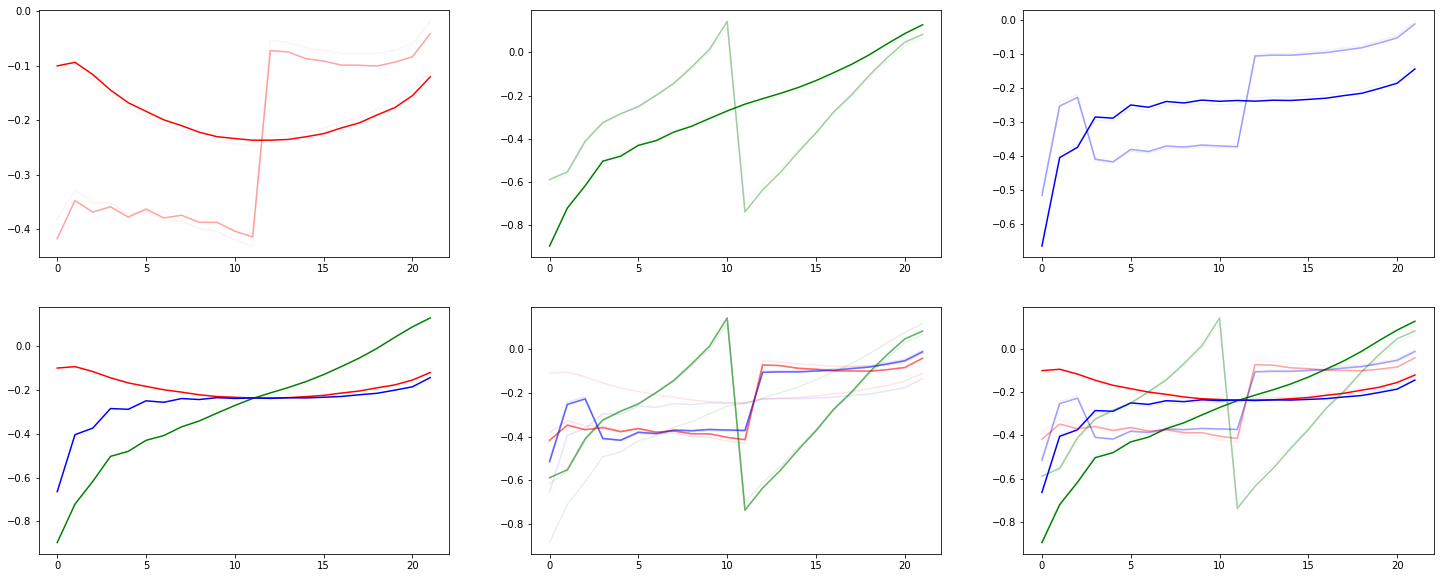

In [29]:
fig, ax = plt.subplots(2, 3)


for i in range(len(centroids)):
    for j in range(3):
        if i == 0:
            if j == 0:
                ax[1][0].plot(range(len(centroids[i][j])), centroids[i][j], c='r')
                ax[1][2].plot(range(len(centroids[i][j])), centroids[i][j], c='r')
                ax[0][0].plot(range(len(centroids[i][j])), centroids[i][j], c='r')
            elif j == 1:    
                ax[1][0].plot(range(len(centroids[i][j])), centroids[i][j], c='g')
                ax[1][2].plot(range(len(centroids[i][j])), centroids[i][j], c='g')
                ax[0][1].plot(range(len(centroids[i][j])), centroids[i][j], c='g')
            else:   
                ax[1][0].plot(range(len(centroids[i][j])), centroids[i][j], c='b')
                ax[1][2].plot(range(len(centroids[i][j])), centroids[i][j], c='b')
                ax[0][2].plot(range(len(centroids[i][j])), centroids[i][j], c='b')
        else:
            if j == 0:
                ax[1][1].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.1, c='r')
                ax[1][2].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.05, c='r')
                ax[0][0].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.05, c='r')
            elif j == 1:    
                ax[1][1].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.1, c='g')
                ax[1][2].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.05, c='g')
                ax[0][1].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.05, c='g')
            else:   
                ax[1][1].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.1, c='b')
                ax[1][2].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.05, c='b')
                ax[0][2].plot(range(len(centroids[i][j])), centroids[i][j], alpha=0.05, c='b')
            
fig.set_size_inches(25, 10)
plt.show()

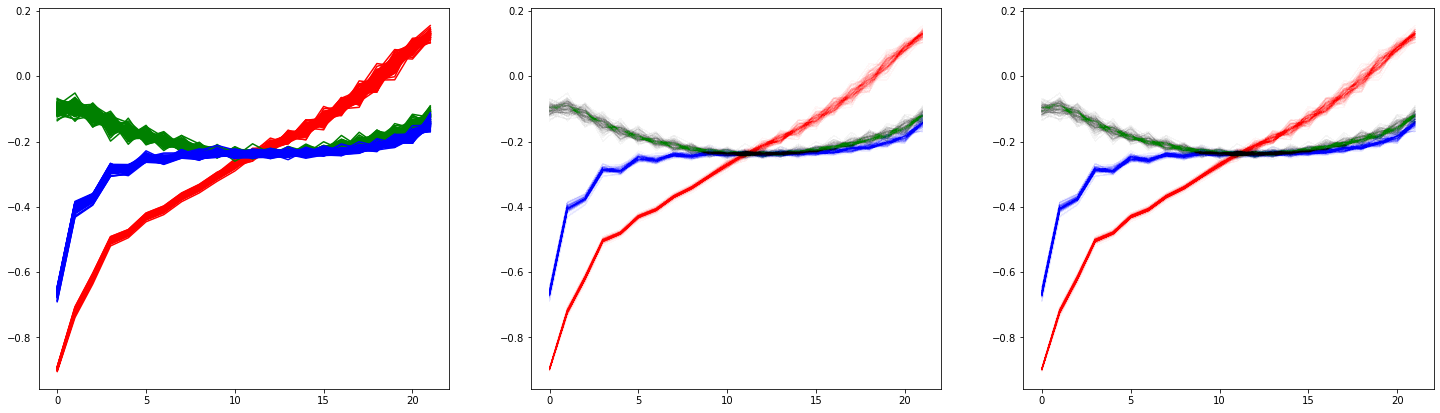

In [46]:
fig, ax = plt.subplots(1, 3)


for i, (l, y) in enumerate(latent):
    l = l.squeeze(-1).detach().numpy()
    y = y.squeeze(1).detach().numpy()

    for j in range(y.shape[0]):
        if i == 0:
            if y[j] == 0:
                ax[2].plot(range(len(l[j])), l[j], alpha=0.002, c='r')
                ax[0].plot(range(len(l[j])), l[j], c='r')
            elif y[j] == 1:
                ax[2].plot(range(len(l[j])), l[j], alpha=0.002, c='g')
                ax[0].plot(range(len(l[j])), l[j], c='g')
            else:
                ax[2].plot(range(len(l[j])), l[j], alpha=0.002, c='b')
                ax[0].plot(range(len(l[j])), l[j], c='b')
        else:
            if y[j] == 0:
                ax[2].plot(range(len(l[j])), l[j], alpha=0.002, c='r')
                ax[1].plot(range(len(l[j])), l[j], alpha=0.002, c='r')
            elif y[j] == 1:
                ax[2].plot(range(len(l[j])), l[j], alpha=0.002, c='g')
                ax[1].plot(range(len(l[j])), l[j], alpha=0.002, c='g')
            else:
                ax[2].plot(range(len(l[j])), l[j], alpha=0.002, c='b')
                ax[1].plot(range(len(l[j])), l[j], alpha=0.002, c='b')

fig.set_size_inches(25, 7)
plt.show()